CODE--Calculating Confusion matrix,AccuracySensitivity and Specificity

LAB- Sensitivity and Specificity

In [13]:

import sklearn as sk
import pandas as pd
import numpy as np
import scipy as sp


Fiber_df= pd.read_csv("/content/sample_data/Fiberbits.csv")




#Fitting logistic regression for active customer on rest of the varibles

In [2]:
import statsmodels.formula.api as sm
logistic1 = sm.logit(formula='active_cust~income+months_on_network+Num_complaints+number_plan_changes+relocated+monthly_bill+technical_issues_per_month+Speed_test_result', data=Fiber_df)
fitted1 = logistic1.fit()
fitted1.summary()


Optimization terminated successfully.
         Current function value: 0.493647
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            active_cust   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99991
Method:                           MLE   Df Model:                            8
Date:                Thu, 04 Jul 2024   Pseudo R-squ.:                  0.2748
Time:                        00:41:09   Log-Likelihood:                -49365.
converged:                       True   LL-Null:                       -68074.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -17.6101      0.301    -58.538      0.000     -18.200     -17.020
income                         0.0017   8.21e-05     20.820      0.000       0.002       0.002
months_on_network              0.0288      0.001     28.654      0.000       0.027       0.031
Num_complaints                -0.6865      0.030    -22.811      0.000      -0.746      -0.628
number_plan_changes           -0.1896      0.008    -24.940      0.000      -0.205      -0.175
relocated                     -3.1626      0.040    -79.927      0.000      -3.240      -3.085
monthly_bill                  -0.0022      0.000    -13.995      0.000      -0.003      -0.002
technical_issues_per_month    -0.3904      0.007    -54.581      0.000      -0.404      -0.376
Speed_test_result              0.2222      0.002     93.435      0.000       0.218       0.227
==============================================================================================
"""

#Predict the variable active customer from logistic fit

In [3]:
predicted_values1=fitted1.predict(Fiber_df[["income"]+['months_on_network']+['Num_complaints']+['number_plan_changes']+['relocated']+['monthly_bill']+['technical_issues_per_month']+['Speed_test_result']])
predicted_values1[1:10]


1    0.837011
2    0.832711
3    0.831174
4    0.808970
5    0.852026
6    0.827130
7    0.855046
8    0.851314
9    0.855379
dtype: float64

Converting predicted values into classes using threshold

In [4]:
threshold=0.5
predicted_class1=np.zeros(predicted_values1.shape)
predicted_class1[predicted_values1>threshold]=1
predicted_class1

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Fiber_df[['active_cust']],predicted_class1)
print('Confusion Matrix : \n', cm1)

Confusion Matrix : 
 [[29492 12649]
 [10847 47012]]


A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. In your case, the confusion matrix is:

```
Confusion Matrix:
[[29492 12649]
 [10847 47012]]
```

Here is what each element of this matrix represents:

- **True Positives (TP):** The number of true positive predictions, which is the bottom right element of the matrix. These are the cases in which the model correctly predicted the positive class. In this case, there are 47,012 true positives.
  
- **True Negatives (TN):** The number of true negative predictions, which is the top left element of the matrix. These are the cases in which the model correctly predicted the negative class. In this case, there are 29,492 true negatives.
  
- **False Positives (FP):** The number of false positive predictions, which is the top right element of the matrix. These are the cases in which the model incorrectly predicted the positive class. In this case, there are 12,649 false positives.
  
- **False Negatives (FN):** The number of false negative predictions, which is the bottom left element of the matrix. These are the cases in which the model incorrectly predicted the negative class. In this case, there are 10,847 false negatives.

Based on these numbers, we can calculate the following metrics:

1. **Accuracy:** This measures the overall correctness of the model and is calculated as:
   \[
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
   \]
   Substituting the values:
   \[
   \text{Accuracy} = \frac{47012 + 29492}{47012 + 29492 + 12649 + 10847} = \frac{76504}{99900} \approx 0.766
   \]
   This means the model has an accuracy of approximately 76.6%.

2. **Sensitivity (Recall or True Positive Rate):** This measures the proportion of actual positives that are correctly identified by the model and is calculated as:
   \[
   \text{Sensitivity} = \frac{TP}{TP + FN}
   \]
   Substituting the values:
   \[
   \text{Sensitivity} = \frac{47012}{47012 + 10847} = \frac{47012}{57859} \approx 0.813
   \]
   This means the model has a sensitivity of approximately 81.3%.

3. **Specificity (True Negative Rate):** This measures the proportion of actual negatives that are correctly identified by the model and is calculated as:
   \[
   \text{Specificity} = \frac{TN}{TN + FP}
   \]
   Substituting the values:
   \[
   \text{Specificity} = \frac{29492}{29492 + 12649} = \frac{29492}{42141} \approx 0.700
   \]
   This means the model has a specificity of approximately 70.0%.

4. **Precision (Positive Predictive Value):** This measures the proportion of positive predictions that are actually correct and is calculated as:
   \[
   \text{Precision} = \frac{TP}{TP + FP}
   \]
   Substituting the values:
   \[
   \text{Precision} = \frac{47012}{47012 + 12649} = \frac{47012}{59661} \approx 0.788
   \]
   This means the model has a precision of approximately 78.8%.

These metrics provide a comprehensive understanding of the model's performance across different aspects.

In [5]:

total1=sum(sum(cm1))

from confusion matrix calculate accuracy

In [6]:
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)



Accuracy :  0.76504
Sensitivity :  0.6998410099428111
Specificity :  0.8125270053060025


Sensitivity vs Specificity with Different Thresholds

Change in Confusion Matrix, Accuracy and Sensitivity-Specificity

Confusion matrix, Accuracy, sensitivity and specificity

In [8]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Fiber_df[['active_cust']],predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

Confusion Matrix : 
 [[37767  4374]
 [30521 27338]]


from confusion matrix calculate accuracy

In [9]:
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)


Accuracy :  0.65105
Sensitivity :  0.8962055955008187
Specificity :  0.4724934755180698


CODE------ROC and AUC

ROC AND AUC For Fiber bits model

for visualising the plots use matplotlib and import roc_curve,auc from sklearn.metrics

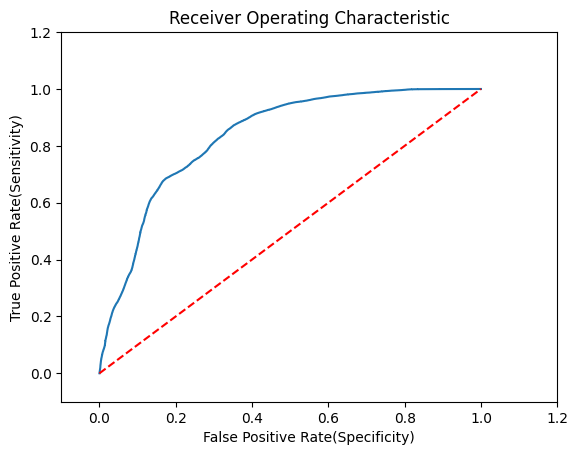

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = Fiber_df[['active_cust']]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predicted_values1)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()


Area under Curve-AUC

In [12]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.83503747960843